# US Automobile Accidents - A Technical Report and Analysis 

![Alt text](image-1.png)

![Alt text](image-2.png)
### Version_1
- Loaded data into Dataframe and performed some basic analysis and dropping of rows.

### Version_2
- Added additional analysis on the data and corrected the layout of the report. Also changed the style of the Markdown Cells to be formatted correctly. Also added a picture at the top of the report showing the layout of the report required for the project. 
#### 10/01/2023



# Section 1: Introduction 

# Section 2: Data Acquisition and Cleaning

### Libraries used in this project: 


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import plotly.graph_objects as go
import scipy.stats as stats

In [40]:
# From csv to pd dataframe
df = pd.read_csv(r'C:\Users\user\Desktop\School\MSAAI_500\Group_Project\US_Accidents_March23.csv')

# col change 
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# filtering out data before 2018
df_filtered = df[df['Start_Time'].dt.year >= 2018]

# sorting by time 
df_sorted = df_filtered.sort_values(by='Start_Time')

# changin the df ref name 
df = df_sorted

df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7576435,A-7625803,Source1,4,2018-01-01 00:07:06,2018-01-01 06:07:06,41.730490,-86.338150,41.704050,-86.625760,14.945,...,False,False,False,False,False,False,Night,Night,Night,Night
7576436,A-7625804,Source1,2,2018-01-01 00:08:27,2018-01-01 00:38:27,39.976279,-83.116542,39.976279,-83.116542,0.000,...,False,False,False,False,False,False,Night,Night,Night,Night
7576437,A-7625805,Source1,2,2018-01-01 00:08:27,2018-01-01 00:38:27,39.975830,-83.117170,39.975830,-83.117170,0.000,...,False,False,False,False,False,False,Night,Night,Night,Night
7576469,A-7625837,Source1,4,2018-01-01 00:13:51,2018-01-01 06:13:51,33.823210,-84.129240,33.824210,-84.150250,1.208,...,False,False,False,False,False,False,Night,Night,Night,Night
7576680,A-7626048,Source1,4,2018-01-01 00:14:30,2018-01-01 06:14:30,39.128510,-94.567830,39.130970,-94.567890,0.170,...,False,False,False,False,False,False,Night,Night,Night,Night


#### Getting all of the column names in the Data Frame and Explaining Them

In [13]:
column_names_list = df.columns.values.tolist()
column_names_list

['ID',
 'Source',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

### Droping Columns that are Blank or Not Needed for analysis

In [14]:
# Columns to drop
columns_to_drop = ['Country', 'Timezone', 'Airport_Code', 'Description', 'Street']
df = df.drop(columns=columns_to_drop)

# Verify
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7576435,A-7625803,Source1,4,2018-01-01 00:07:06,2018-01-01 06:07:06,41.730490,-86.338150,41.704050,-86.625760,14.945,...,False,False,False,False,False,False,Night,Night,Night,Night
7576436,A-7625804,Source1,2,2018-01-01 00:08:27,2018-01-01 00:38:27,39.976279,-83.116542,39.976279,-83.116542,0.000,...,False,False,False,False,False,False,Night,Night,Night,Night
7576437,A-7625805,Source1,2,2018-01-01 00:08:27,2018-01-01 00:38:27,39.975830,-83.117170,39.975830,-83.117170,0.000,...,False,False,False,False,False,False,Night,Night,Night,Night
7576469,A-7625837,Source1,4,2018-01-01 00:13:51,2018-01-01 06:13:51,33.823210,-84.129240,33.824210,-84.150250,1.208,...,False,False,False,False,False,False,Night,Night,Night,Night
7576680,A-7626048,Source1,4,2018-01-01 00:14:30,2018-01-01 06:14:30,39.128510,-94.567830,39.130970,-94.567890,0.170,...,False,False,False,False,False,False,Night,Night,Night,Night


#### We can come back and Fill this out later 

ID: The ID of the accident, unique key.
 
Source: Pulled from two diffrerent sources 

Severity: On a scale of 1-4, how severe the accident was at the time of recording, four being the most severe. 

Start_Time: Date the accident took place, in the format of YYYY-MM-DD HH:MM:SS (We have filtered out any dates that are older than 2018)

End_Time: Date the accident ended, in the format of YYYY-MM-DD HH:MM:SS

Start_Lat: Latitude of the accident from inital impact

Start_Lng: Longitude of the accident from inital impact

End_Lat: Latitude of the accident from ending place of the vehicle 

End_Lng: Longitude of the accident from ending place of the vehicle

Distance(mi): distance in miles that the accident occured from the starting point

Description: Description of the accident and the incident that occured 

Street: Street name of the accident

City: City name of the accident

County: County name of the accident

State: State name of the accident (49 states are listed in this data set)

Zipcode: Zipcode that the accident Occured in

Country: Country of the Accident (All accidents that occured happened in the United States)

Timezone: Timezone of the accident

Airport_Code: The closest Airport to the accident

Weather_Timestamp:

Temperature(F)

Wind_Chill(F): 

Humidity(%): 

Pressure(in): 

Visibility(mi): 

Wind_Direction: 

Wind_Speed(mph): 

Precipitation(in): 

Weather_Condition: 

Amenity: 

Bump: 

Crossing: 

Give_Way: 

Junction: 

No_Exit: 

Railway: 

Roundabout: 

Station: 

Stop: 

Traffic_Calming: 

Traffic_Signal: 

Turning_Loop: 

Sunrise_Sunset: 

Civil_Twilight: 

Nautical_Twilight: 

Astronomical_Twilight: 


### Changing all of the Values that are True or False to 1 or 0 

In [15]:

# Define a function to convert boolean to integer
def convert_boolean(val):
    if isinstance(val, bool):
        return int(val)
    return val

# Apply the function to the entire DataFrame
df = df.applymap(convert_boolean)

# To verify the changes
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7576435,A-7625803,Source1,4,2018-01-01 00:07:06,2018-01-01 06:07:06,41.730490,-86.338150,41.704050,-86.625760,14.945,...,0,0,0,0,0,0,Night,Night,Night,Night
7576436,A-7625804,Source1,2,2018-01-01 00:08:27,2018-01-01 00:38:27,39.976279,-83.116542,39.976279,-83.116542,0.000,...,0,0,0,0,0,0,Night,Night,Night,Night
7576437,A-7625805,Source1,2,2018-01-01 00:08:27,2018-01-01 00:38:27,39.975830,-83.117170,39.975830,-83.117170,0.000,...,0,0,0,0,0,0,Night,Night,Night,Night
7576469,A-7625837,Source1,4,2018-01-01 00:13:51,2018-01-01 06:13:51,33.823210,-84.129240,33.824210,-84.150250,1.208,...,0,0,0,0,0,0,Night,Night,Night,Night
7576680,A-7626048,Source1,4,2018-01-01 00:14:30,2018-01-01 06:14:30,39.128510,-94.567830,39.130970,-94.567890,0.170,...,0,0,0,0,0,0,Night,Night,Night,Night


56.6 s Function 

### Dropping all rows with missing values

In [41]:
# Dropping all rows with missing vals 
df = df.dropna()

print(df.shape)

(3543143, 46)


# Section 3: Exploratory Data Analysis (EDA)

### Correlation Matrix to see the correlation between all of the Variables

C:\Users\user\AppData\Local\Temp\ipykernel_22384\2627926641.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation_Matrix = df.corr()


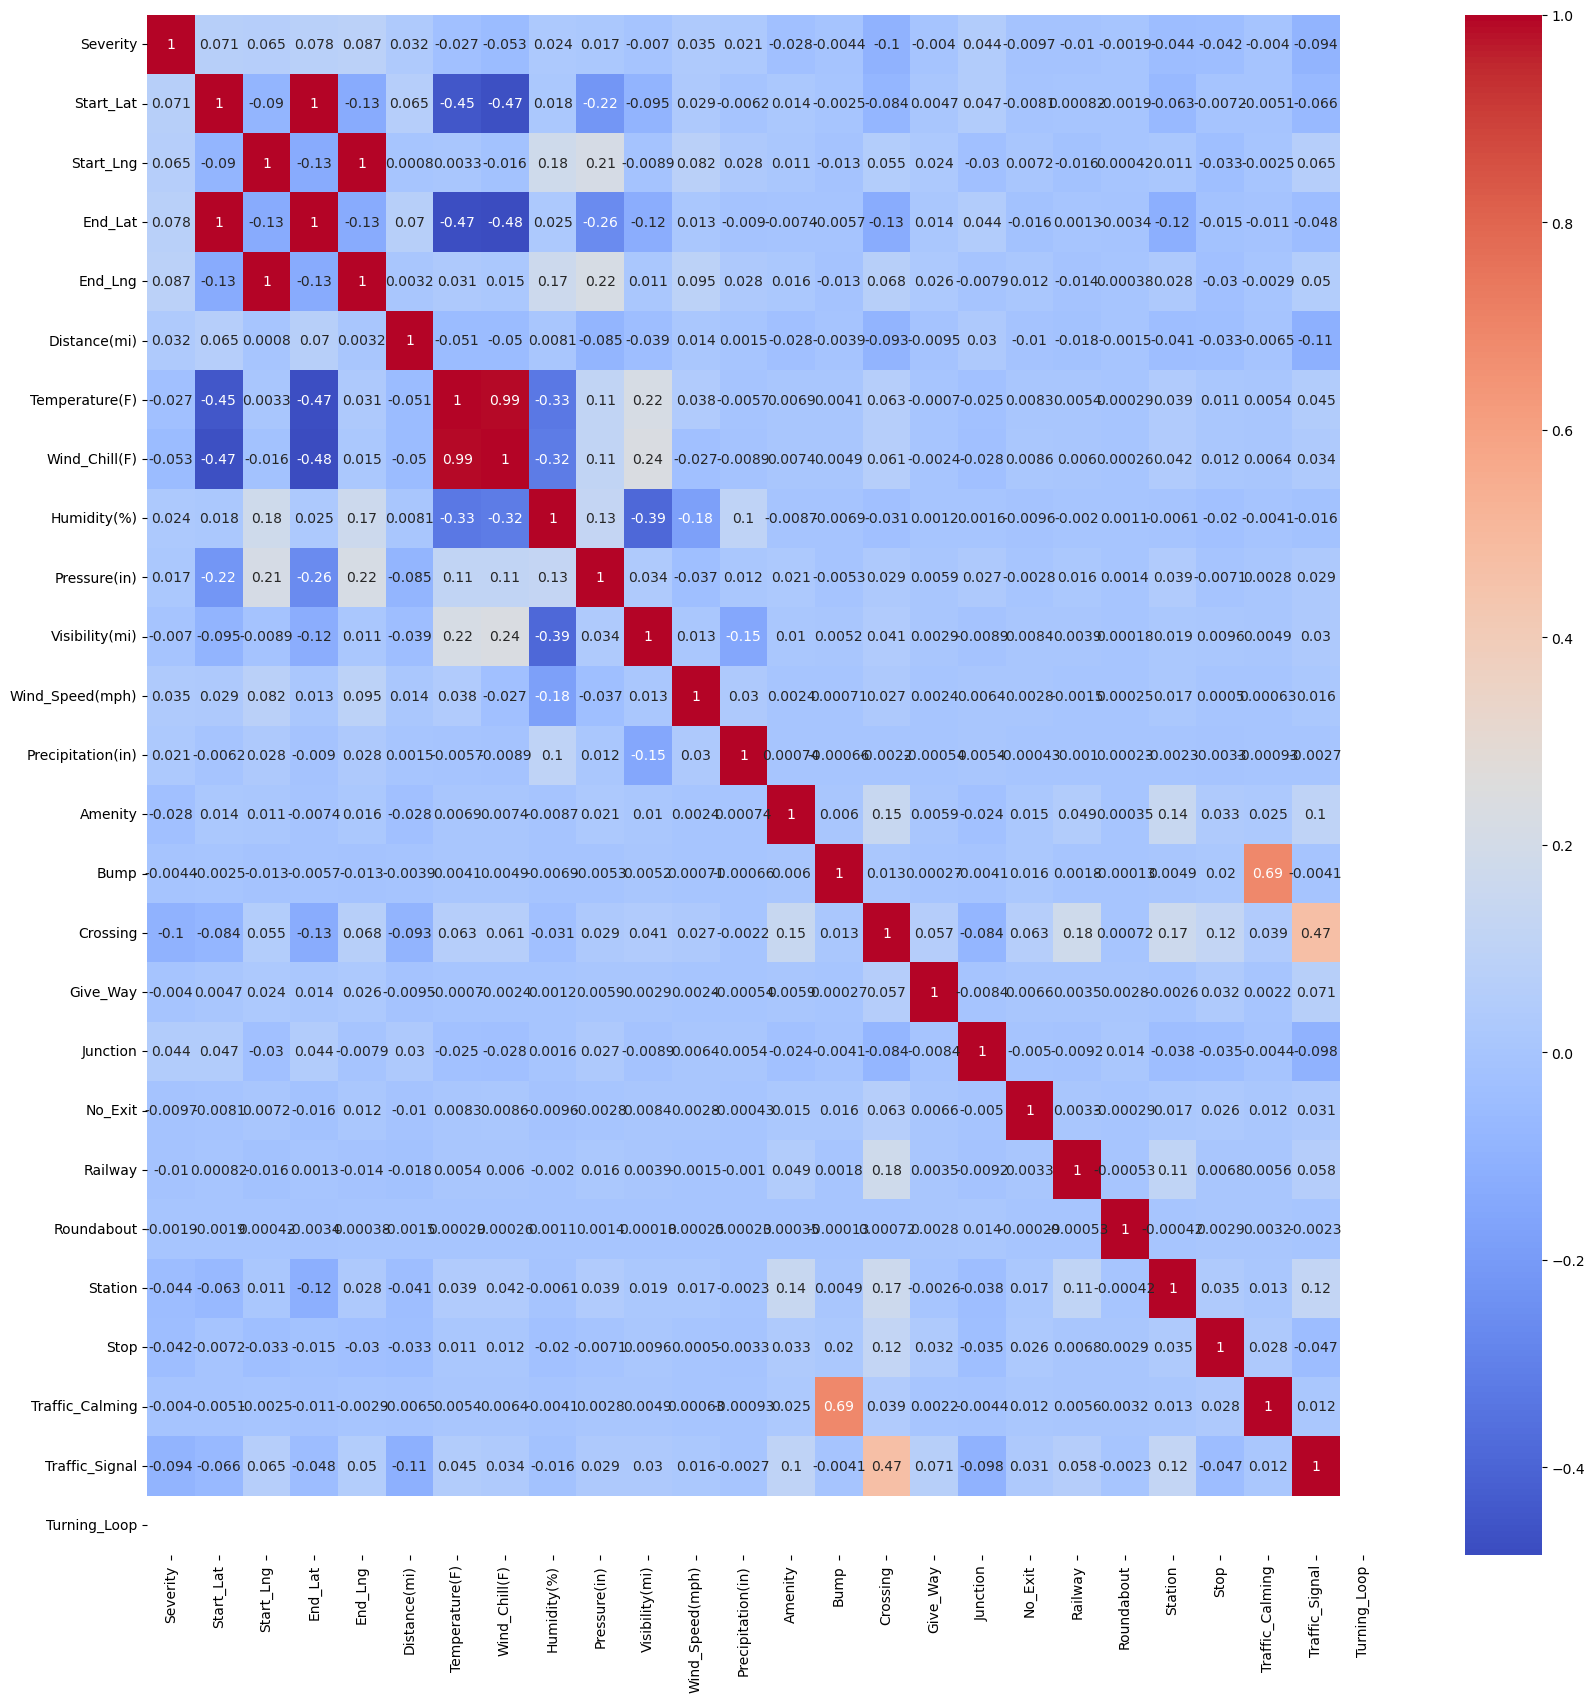

In [8]:
Correlation_Matrix = df.corr()

# Correlation Heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(Correlation_Matrix, annot=True, cmap='coolwarm')
plt.show()



#### Pivot table to get the count of accidents by State and the Severity of Accident counts 

In [17]:
pivot_table = pd.pivot_table(df, index='State', columns='Severity', values='ID', aggfunc='count', fill_value=0)
pivot_table['Total'] = pivot_table.sum(axis=1)

print(pivot_table)

Severity      1        2       3      4    Total
State                                           
AL          678    75609   20059   1659    98005
AR           37    19176     638   2769    22620
AZ         7382   129556   14781   3791   155510
CA        10097  1265647  161806  10683  1448233
CO          968    50949   24137   6402    82456
CT           61    45188   11459   3345    60053
DC          143    15768     810    692    17413
DE          234    10843     563   1285    12925
FL         7043   689748   74807  10828   782426
GA          993    80741   41811  10369   133914
IA           56    14810    4876   1544    21286
ID            1    10046     126    416    10589
IL         1611    75360   46388   3210   126569
IN          323    40111   13726   4494    58654
KS           34    13313    4504    642    18493
KY          288    16059   10707    850    27904
LA         2532   117138   15315   1634   136619
MA         1492    32308   13502    448    47750
MD          494    9

### The Pivot Table shows that there are 49 states, The only State Missing from this data set is The State of Hawaii

### Interactive Map of Accidents by The State 

In [27]:
state_counts = df["State"].value_counts()
fig = go.Figure(data=go.Choropleth(locations=state_counts.index, z=state_counts.values.astype(float), locationmode="USA-states", colorscale="turbo"))
fig.update_layout(title_text="Number of US Accidents for each State", geo_scope="usa")
fig.show()

### Getting the top 20 Cities with the most accidents

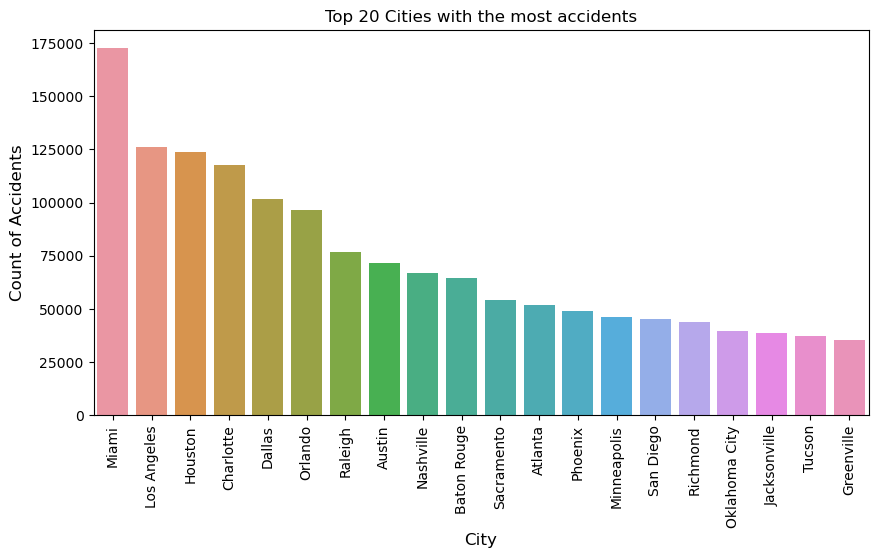

In [30]:
# Get the top 20 cities with the most accidents
top_20_cities = city_counts[:20]

plt.figure(figsize=(10,5))
sns.barplot(x=top_20_cities.index, y=top_20_cities.values, alpha=1)
plt.title('Top 20 Cities with the most accidents')
plt.ylabel('Count of Accidents', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation=90)
plt.show()

### Getting the Top 5 States with the most Accidents 

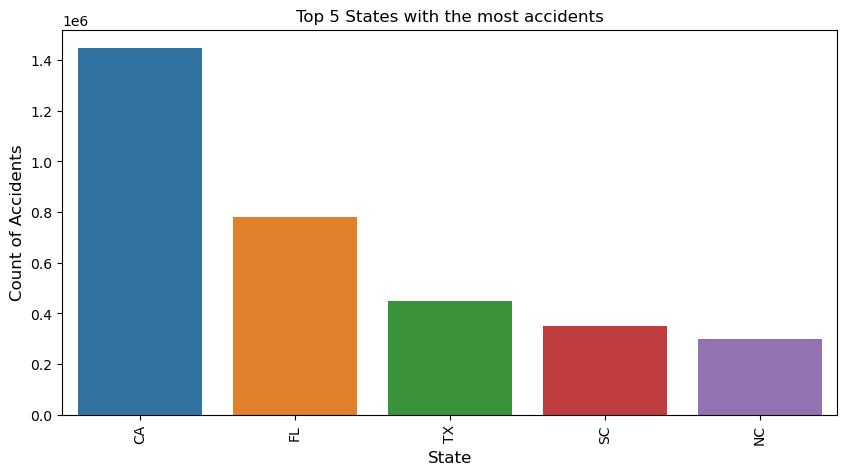

In [35]:
# getting the top 5 States with the most accidents

top_5_states = state_counts[:5]

plt.figure(figsize=(10,5))
sns.barplot(x=top_5_states.index, y=top_5_states.values, alpha=1)
plt.title('Top 5 States with the most accidents')
plt.ylabel('Count of Accidents', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.xticks(rotation=90)
plt.show()

### Plotting the Amount of Accidents by Year 

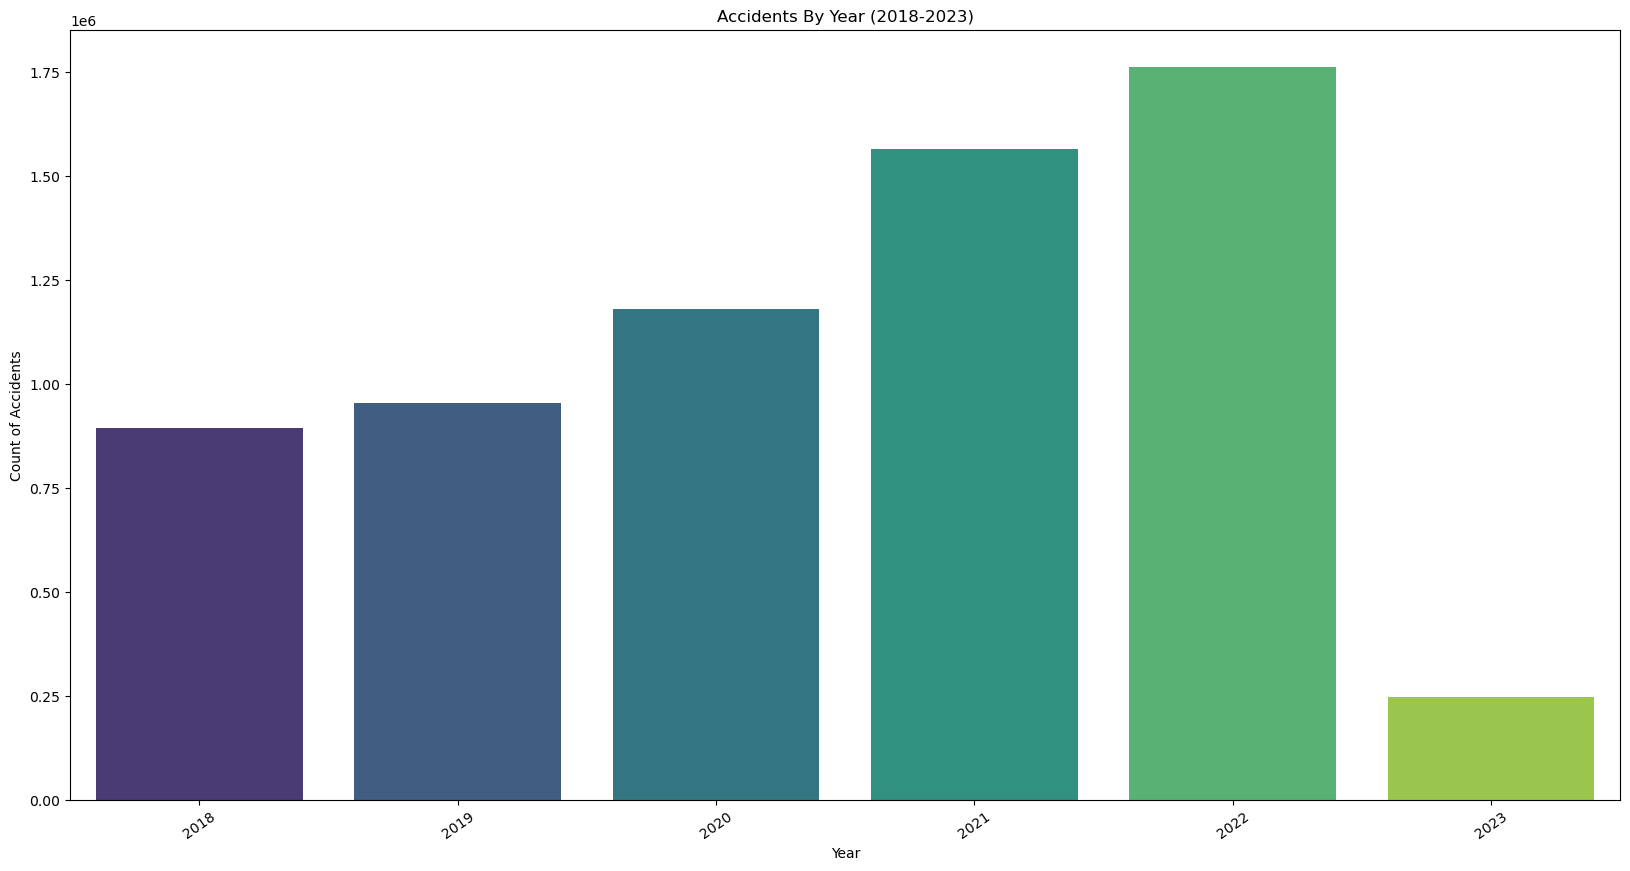

In [18]:
# Creating a histogram of the accidents by year using Seaborn
df['Year'] = df['Start_Time'].dt.year
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='Year', palette='viridis')
plt.xlabel('Year')
plt.ylabel('Count of Accidents')
plt.title('Accidents By Year (2018-2023)')
plt.xticks(rotation=35)
plt.show()


#### We only have data going up until March of 2023, We can either drop the data or keep it, because we are looking for variables that are correlated with the severity of the accident and date, doesn't matter as much as time of day.

#### Severity Count of Accidents by Year 

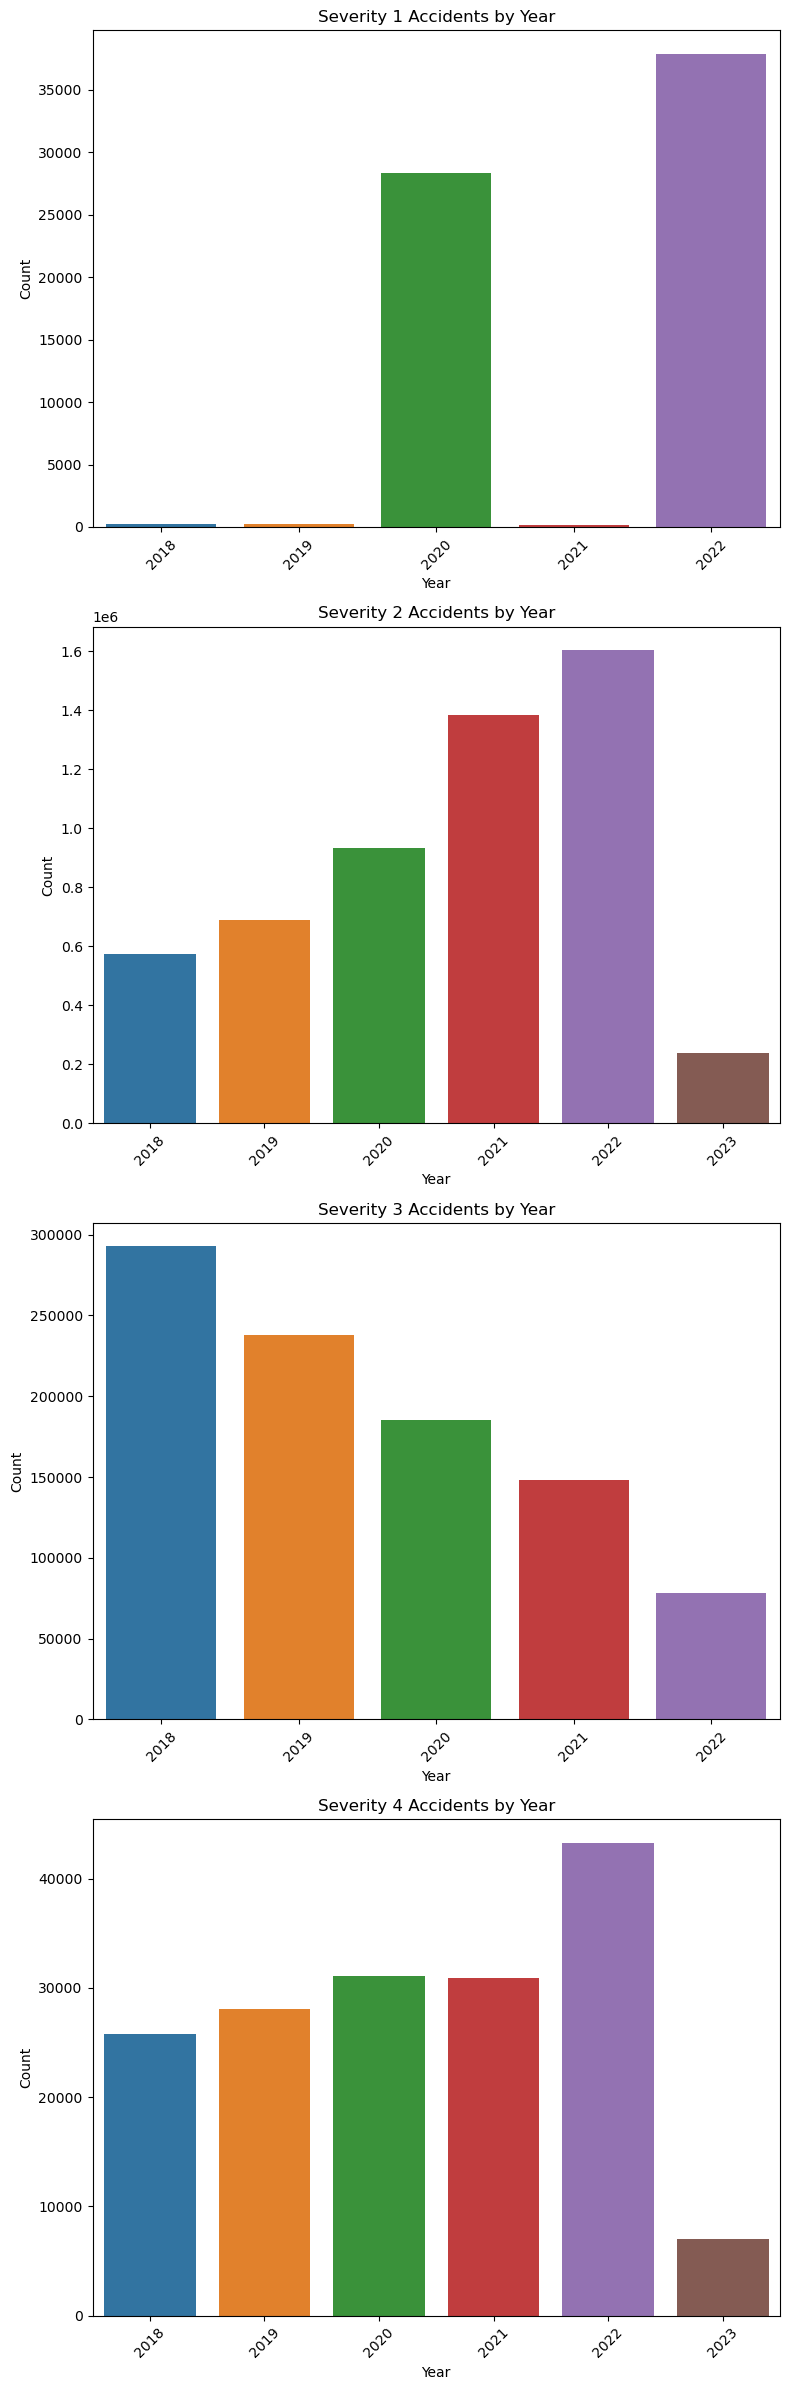

In [19]:
# Extracting the year from the datetime column
df['Year'] = df['Start_Time'].dt.year

# Defining the severity 
severity_levels = [1, 2, 3, 4]

fig, axes = plt.subplots(len(severity_levels), figsize=(8, 6 * len(severity_levels)))


for i, severity in enumerate(severity_levels):
    subset = df[df['Severity'] == severity]
    
    count_by_year = subset.groupby('Year').size()
    
    sns.barplot(x=count_by_year.index, y=count_by_year.values, ax=axes[i])
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Severity {severity} Accidents by Year')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

### Getting the most common Weather Conditions at The Time of the Accident

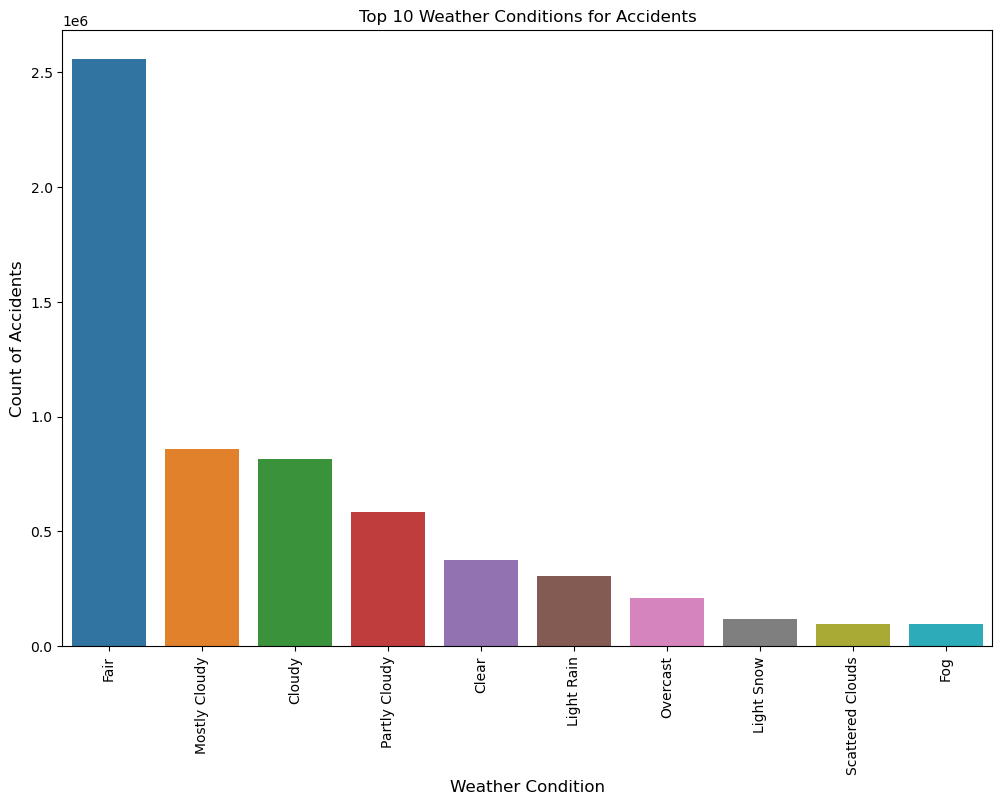

In [36]:
weather_conditions = df['Weather_Condition'].value_counts()[:10]
plt.figure(figsize=(12,8))
sns.barplot(x=weather_conditions.index, y=weather_conditions.values, alpha=1)
plt.title('Top 10 Weather Conditions for Accidents')
plt.ylabel('Count of Accidents', fontsize=12)
plt.xlabel('Weather Condition', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Modeling the data  


#### Getting Mean, Median, Standard Deviation, Variance of the Severity of Accidents

In [20]:
# getting the stats of the severity column
mean = df['Severity'].mean()
median = df['Severity'].median()
std_dev = df['Severity'].std()
variance = df['Severity'].var()

print(f'The mean of the severity column is {mean}')
print(f'The median of the severity column is {median}')
print(f'The standard deviation of the severity column is {std_dev}')
print(f'The variance of the severity column is {variance}')

The mean of the severity column is 2.1829641123240013
The median of the severity column is 2.0
The standard deviation of the severity column is 0.4691629180769501
The variance of the severity column is 0.220113843698479


### Getting the Stats Quickly 

In [23]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Year
count,6.599480e+06,6.599480e+06,6.599480e+06,4.025370e+06,4.025370e+06,6.599480e+06,6.456466e+06,5.579356e+06,6.447341e+06,6.476586e+06,...,6.599480e+06,6.599480e+06,6.599480e+06,6.599480e+06,6.599480e+06,6.599480e+06,6.599480e+06,6.599480e+06,6599480.0,6.599480e+06
mean,2.182964e+00,3.617642e+01,-9.457362e+01,3.620615e+01,-9.578185e+01,6.118888e-01,6.117648e+01,5.901648e+01,6.486121e+01,2.945811e+01,...,6.989566e-02,2.564444e-03,8.522793e-03,3.242680e-05,2.574294e-02,2.779916e-02,1.020838e-03,1.385482e-01,0.0,2.020468e+03
std,4.691629e-01,5.086707e+00,1.736483e+01,5.289033e+00,1.815585e+01,1.838880e+00,1.920384e+01,2.203007e+01,2.295168e+01,1.062359e+00,...,2.549711e-01,5.057537e-02,9.192473e-02,5.694361e-03,1.583674e-01,1.643970e-01,3.193425e-02,3.454745e-01,0.0,1.452167e+00
min,1.000000e+00,2.455480e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.018000e+03
25%,2.000000e+00,3.340789e+01,-1.171666e+02,3.342862e+01,-1.178013e+02,0.000000e+00,4.800000e+01,4.400000e+01,4.800000e+01,2.927000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.019000e+03
50%,2.000000e+00,3.581700e+01,-8.742033e+01,3.614861e+01,-8.802689e+01,5.900000e-02,6.300000e+01,6.300000e+01,6.700000e+01,2.979000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.021000e+03
75%,2.000000e+00,4.003924e+01,-8.033462e+01,4.012074e+01,-8.024004e+01,5.340000e-01,7.600000e+01,7.600000e+01,8.400000e+01,3.001000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.022000e+03
max,4.000000e+00,4.900220e+01,-6.740355e+01,4.900222e+01,-6.740355e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,2.023000e+03


#### Getting the KDE of the Severity of Accidents

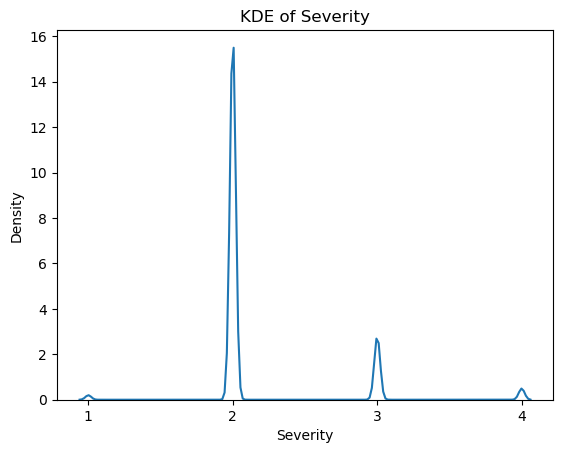

In [22]:
# Plot the KDE
sns.kdeplot(df['Severity'])
plt.title('KDE of Severity')
plt.xlabel('Severity')
plt.ylabel('Density')

xmin, xmax = plt.xlim()
plt.xticks(np.arange(np.ceil(xmin), np.floor(xmax) + 1), 
           [str(int(val)) for val in np.arange(np.ceil(xmin), np.floor(xmax) + 1)])

plt.show()

### Creating Columns 

# Section 4: Model Selection 

# Section 5: Model Evaluation And Analysis

# Section 6: Conclusion and Recommendations